In [49]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

font = {'family' : 'sans',
        'size'   : 24}

plt.rc('font', **font)

%matplotlib inline

In [43]:
data = dict()
for filename in os.listdir('results_250M'):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename, names=[
            'L1d Accesses',
            'L1d Hits',
            'L1d Misses',
            'L1i Accesses',
            'L1i Hits',
            'L1i Misses',
            'L2 Accesses',
            'L2 Hits',
            'L2 Misses',
            'LLC Accesses',
            'LLC Hits',
            'LLC Misses',
            'BP MPKI'
        ])
        data[filename.split('.')[0]] = df

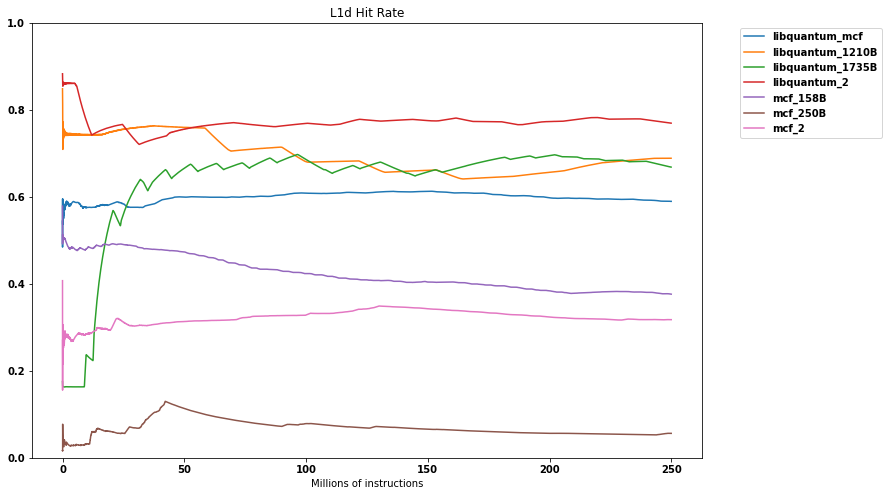

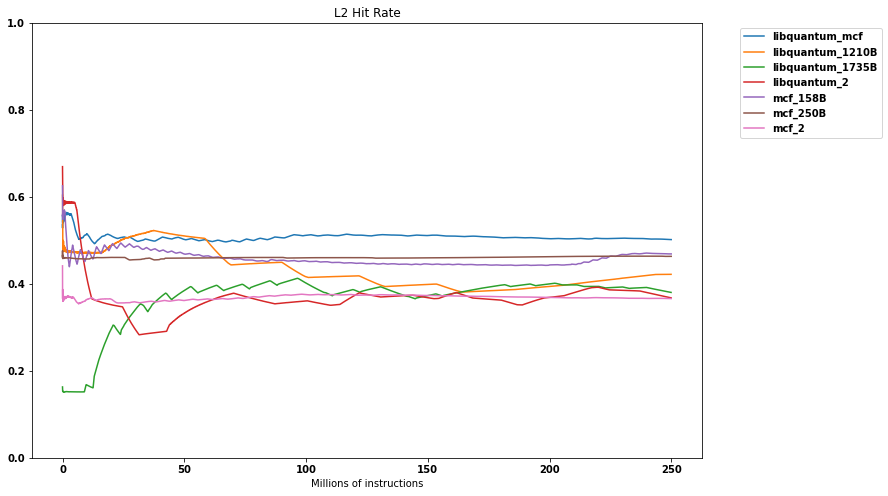

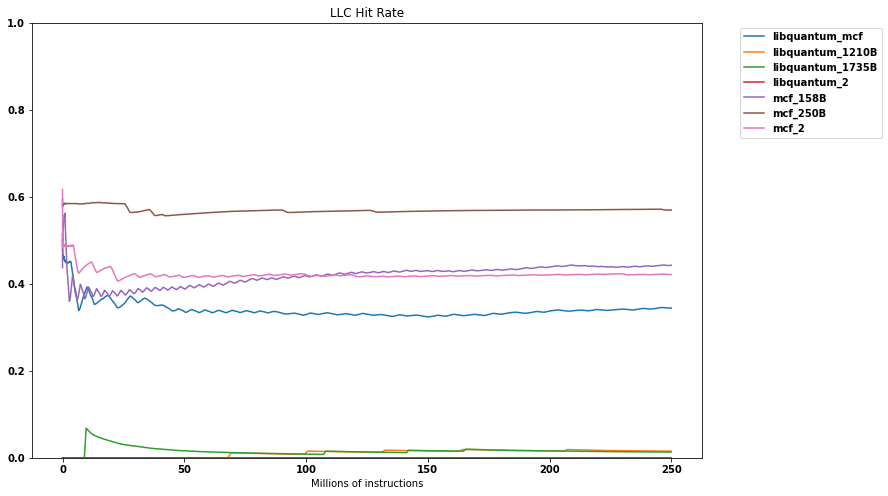

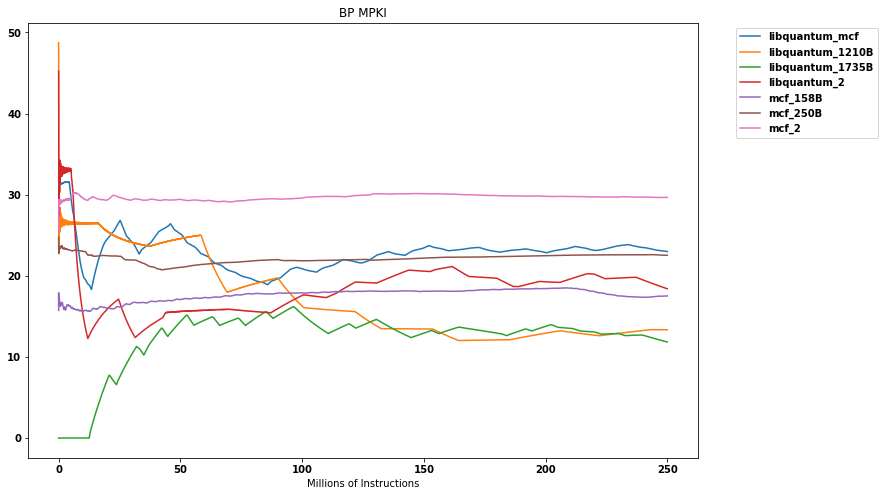

In [50]:
for cache in ['L1d', 'L2', 'LLC']:
    plt.figure(figsize=(12,8))
    for bench, cur_data in data.items():
        hit_rate_data = np.array(cur_data[cache + ' Hits'] / cur_data[cache + ' Accesses'])
        sample_percentage = [float(x) / len(hit_rate_data) * 250 for x in range(0, len(hit_rate_data))]
        plt.plot(sample_percentage, hit_rate_data, label=bench)
    plt.xlabel('Millions of instructions')
    plt.ylim((0, 1))
    plt.title(cache + ' Hit Rate')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

plt.figure(figsize=(12,8))
for bench, cur_data in data.items():
    bp_data = np.array(cur_data['BP MPKI'])
    sample_percentage = [float(x) / len(bp_data) * 250 for x in range(0, len(bp_data))]
    plt.plot(sample_percentage, bp_data, label=bench)
plt.xlabel('Millions of Instructions')
plt.title('BP MPKI')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()